In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

<p style='font-size:20px'>x<sub>t</sub> = const + ꞵ<sub>1</sub>Ɛ<sub>t-1</sub>+ ꞵ<sub>2</sub>Ɛ<sub>t-2</sub>+ꞵ<sub>3</sub>Ɛ<sub>t-3</sub>+ ꞵ<sub>4</sub>Ɛ<sub>t-4</sub>+ꞵ<sub>5</sub>t-Ɛ<sub>5</sub>+ ꞵ<sub>6</sub>Ɛ<sub>t-6</sub>+Ɛ<sub>t</sub></p>
    <br></br>
const = 100 , b1 = 0.70,b2=0.40,b3=0.35,b4=0.70,b5=.050,b6=0.65 

In [3]:
# date range starting date and end date 
date_index = pd.date_range(start='1/1/2020',end='2/1/2023') # mmddyy
avg_mu = 100.0
errors =np.random.normal(0,1,1300)

# generating time series 
time_series = []
for t in range (1,len(date_index)+1):
    # MA[6] --> moving average model with 6 lags 
    xt = avg_mu+0.70*errors[t-1]+.40*errors[t-2]+.35*errors[t-3]\
    + .70*errors[t-4]+.50*errors[t-5]+.65*errors[t-6]+errors[t]
    time_series.append(xt)



In [4]:
print('date range ')
print('*'*25)
print(date_index)

date range 
*************************
DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26',
               '2023-01-27', '2023-01-28', '2023-01-29', '2023-01-30',
               '2023-01-31', '2023-02-01'],
              dtype='datetime64[ns]', length=1128, freq='D')


In [5]:
time_series


[97.71465107660067,
 97.25120329303802,
 97.71785690964735,
 97.55772809567647,
 99.50765148301952,
 98.74568555915613,
 102.31599320625206,
 100.24209635014256,
 100.84527777975056,
 101.92135316945041,
 101.05163666170748,
 99.57022952183256,
 98.75828525179824,
 98.17578856436597,
 99.65077155629619,
 98.77285322904113,
 98.30612954104929,
 100.23534948016052,
 100.74426558904977,
 101.25956142638121,
 102.65887854304489,
 104.24172904107543,
 103.47881251827944,
 104.0095245131229,
 104.37923136314755,
 105.12236085691687,
 102.24445726323943,
 103.57337576182209,
 101.19235128427366,
 101.26727106242649,
 99.98447157860983,
 100.95176055541727,
 100.97383467896722,
 102.04649753189963,
 100.657939562179,
 101.45752815516738,
 102.88049587761708,
 102.11035855658184,
 101.99706303066752,
 102.44405751529962,
 100.81941972816216,
 100.68358625632901,
 101.05760408396787,
 100.27697511215901,
 99.18584777505347,
 100.98849777099542,
 98.17950974064881,
 97.02478228818397,
 97.3847461

In [6]:
df = pd.DataFrame({'date':date_index,'value':time_series})

In [7]:
df

,date,value
0,2020-01-01,97.714651
1,2020-01-02,97.251203
2,2020-01-03,97.717857
3,2020-01-04,97.557728
4,2020-01-05,99.507651
...,...,...
1123,2023-01-28,98.250412
1124,2023-01-29,99.571021
1125,2023-01-30,99.679532
1126,2023-01-31,100.798671


In [8]:
print('top 5 entiers in the data frame ')
print('*'*25)
print(df.head())
print('*'*25)
print("data frame's information")
print(df.info())


top 5 entiers in the data frame 
*************************
        date      value
0 2020-01-01  97.714651
1 2020-01-02  97.251203
2 2020-01-03  97.717857
3 2020-01-04  97.557728
4 2020-01-05  99.507651
*************************
data frame's information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1128 non-null   datetime64[ns]
 1   value   1128 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.8 KB
None


Text(0, 0.5, 'value')

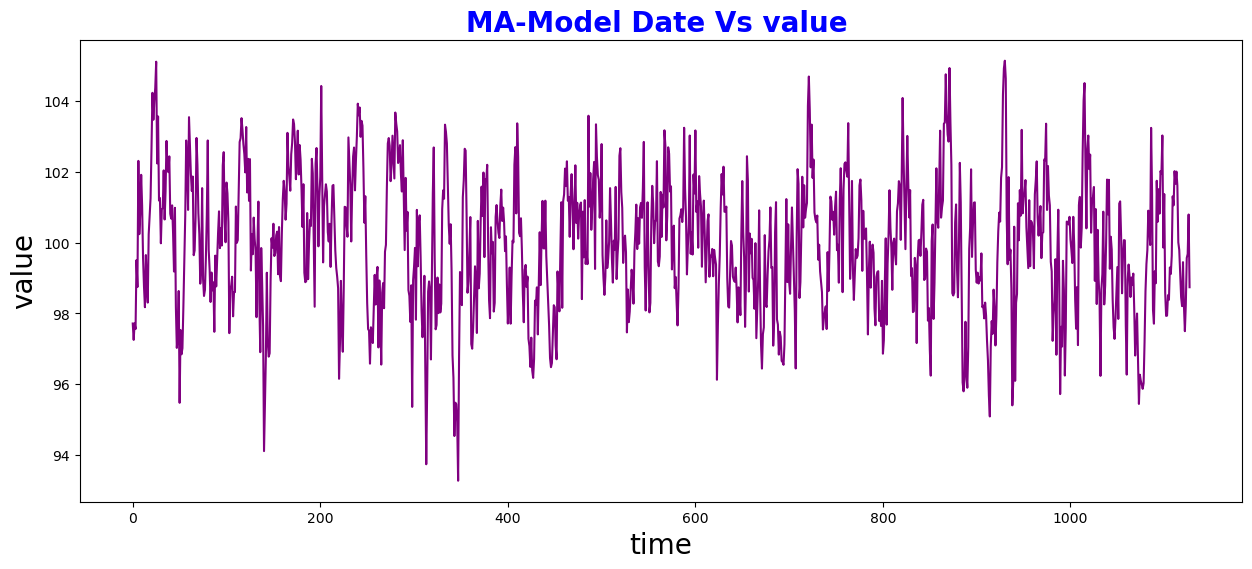

In [9]:
plt.figure(figsize=(15,6))
plt.plot(df['value'],color='purple')
plt.title('MA-Model Date Vs value ',fontsize=20,color='blue',fontweight='bold')
plt.xlabel('time',fontsize=20)
plt.ylabel('value',fontsize=20)

Text(0, 0.5, 'ACF')

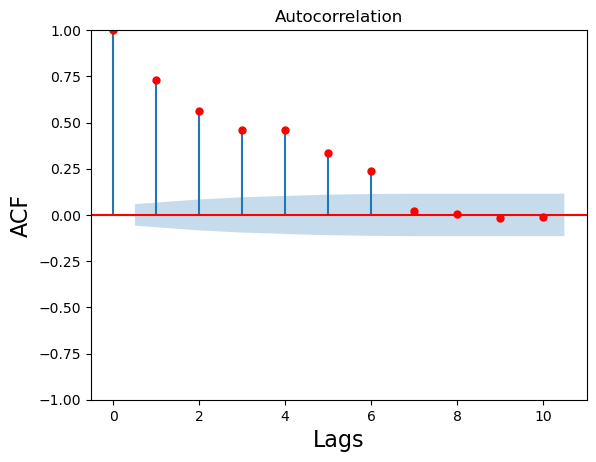

In [10]:
acf_plot = plot_acf(df.value,lags=10,color='red')
plt.xlabel('Lags',fontsize=16)
plt.ylabel('ACF',fontsize=16)

<p style='font-size:20px'>from above plot we can see that there is 6 significant lag </P>

Text(0, 0.5, 'PACF')

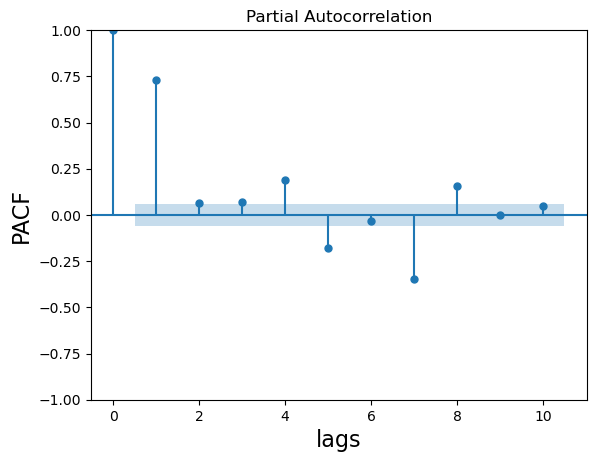

In [11]:
pacf_plot=plot_pacf(df.value,lags=10)
plt.xlabel('lags',fontsize=16)
plt.ylabel('PACF',fontsize=16)

In [12]:
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime,timedelta

time_series = pd.Series(time_series,date_index)
# pd.infer_freq --> this method is used when we want to determine at 
# what frequency the data has been recorded 
# asfreq() is a method which is used to convert a given time series
# to specified freq 
#DataFrame.asfreq(freq, method=None, fill_value=None, normalize=False,how=none)
# freq --> 'd','m','w'

time_series = time_series.asfreq(pd.infer_freq(time_series.index))
display(time_series)

2020-01-01     97.714651
2020-01-02     97.251203
2020-01-03     97.717857
2020-01-04     97.557728
2020-01-05     99.507651
                 ...    
2023-01-28     98.250412
2023-01-29     99.571021
2023-01-30     99.679532
2023-01-31    100.798671
2023-02-01     98.741009
Freq: D, Length: 1128, dtype: float64

<p style='font-size:15px;color:blue'><b style="color:red">NOTE : </b> MA[6] so we will be able to predict only 6 future value after that model will consider mu value for prediction so we will have constant </p>

In [13]:
train_end = datetime(2023,1,1) #yyyymmdd
# predicting for 1 week only considering the note above 
test_bgn = datetime(2023,1,2)
test_end = datetime(2023,2,1)

train_set = time_series[:train_end]
test_set = time_series[test_bgn:test_end]
# using training data set to train the model 
ts_model = ARIMA(train_set,order = (0,0,6))
# now we are fiting the model 
model_fit = ts_model.fit()
# printing the summary of the model 
print('model summary ')
print(model_fit.summary())


model summary 
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1097
Model:                 ARIMA(0, 0, 6)   Log Likelihood               -1624.982
Date:                Mon, 30 Oct 2023   AIC                           3265.965
Time:                        13:57:15   BIC                           3305.968
Sample:                    01-01-2020   HQIC                          3281.100
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.9545      0.139    718.488      0.000      99.682     100.227
ma.L1          0.7375      0.022     33.425      0.000       0.694       0.781
ma.L2          0.4114      0.029     

In [14]:
display(model_fit.params)
display(model_fit.aic)
display(model_fit.param_names)
display(model_fit.fittedvalues)

const     99.954488
ma.L1      0.737503
ma.L2      0.411435
ma.L3      0.338073
ma.L4      0.709884
ma.L5      0.510397
ma.L6      0.626304
sigma2     1.124926
dtype: float64

3265.9648264705834

['const', 'ma.L1', 'ma.L2', 'ma.L3', 'ma.L4', 'ma.L5', 'ma.L6', 'sigma2']

2020-01-01     99.954488
2020-01-02     98.376780
2020-01-03     98.030383
2020-01-04     98.287068
2020-01-05     98.092924
                 ...    
2022-12-28     99.643738
2022-12-29     99.424566
2022-12-30     99.930311
2022-12-31    101.946143
2023-01-01    101.434409
Freq: D, Length: 1097, dtype: float64

Text(0, 0.5, 'values')

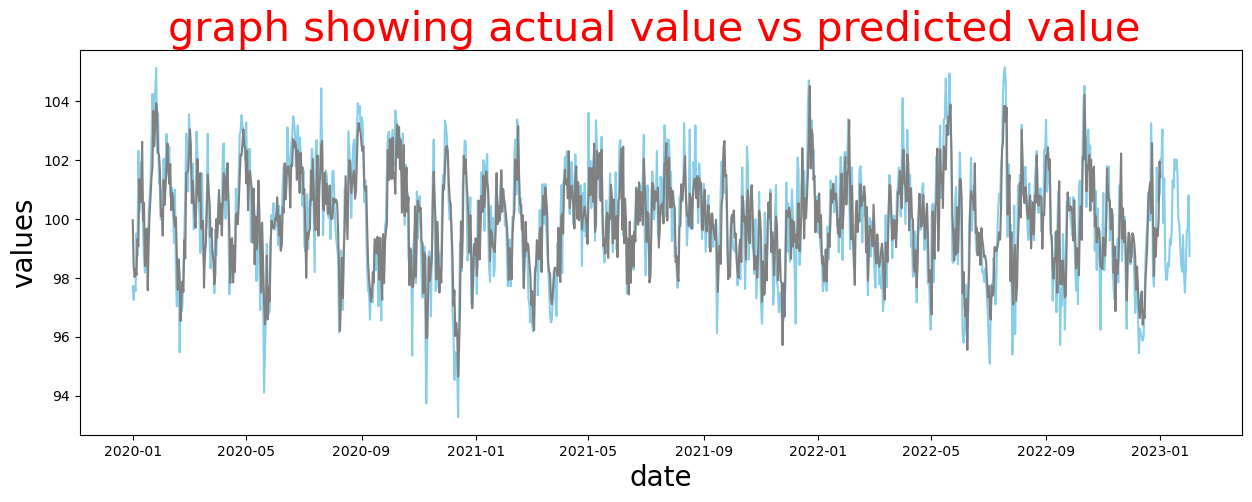

In [15]:
plt.figure(figsize=(15,5))
plt.plot(time_series,color='skyblue')
plt.plot(model_fit.fittedvalues,color='grey')
plt.title('graph showing actual value vs predicted value ',fontsize=30,color='red')
plt.xlabel('date',fontsize=20)
plt.ylabel('values',fontsize=20)

### from the above plot we can infer that model is unable to capture peak values 

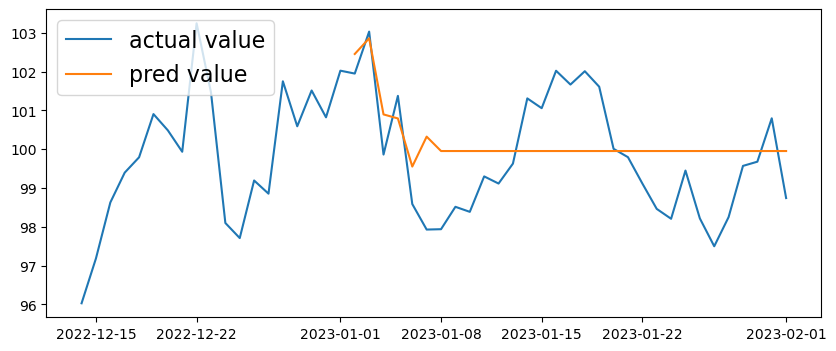

In [16]:
# creating prediction range start = end = 
pred_start = test_set.index[0]
pred_end = test_set.index[-1]
# performing prediction 
prediction = model_fit.predict(start=pred_start,end=pred_end)
# calculating error 
residual = test_set - prediction # actual value - predicted value 
# visualization 
plt.figure(figsize=(10,4))
plt.plot(time_series[-50:])# considering last 50 a actual value  
plt.plot(prediction) # predicted value 
plt.legend(('actual value','pred value'),fontsize=16,loc='upper left')

In [27]:
# here we are getting prediction upto 6 days because we have consider only 6 lags and prediction start from 2/1/23 t0 31/1/23 --> it will predict upto 7 jan
# after that it will be constant as for predicting 2 jan we have 6 data for 3 jan we have 5 data for 4 jan we have 4 data for 5 jan we have 3 data and becz
# of this windows of data goes on decreasing and as a result we are incountering more error

# one way to increase the window is by taking loop

In [28]:
step = 30 
dynamic= True 
forecasted_val = model_fit.forecast(steps=step,dynamic=dynamic)

In [29]:
print(forecasted_val)

2023-01-02    102.044569
2023-01-03    101.636226
2023-01-04    101.300543
2023-01-05    101.980794
2023-01-06    100.476705
2023-01-07    101.138998
2023-01-08    100.087372
2023-01-09    100.087372
2023-01-10    100.087372
2023-01-11    100.087372
2023-01-12    100.087372
2023-01-13    100.087372
2023-01-14    100.087372
2023-01-15    100.087372
2023-01-16    100.087372
2023-01-17    100.087372
2023-01-18    100.087372
2023-01-19    100.087372
2023-01-20    100.087372
2023-01-21    100.087372
2023-01-22    100.087372
2023-01-23    100.087372
2023-01-24    100.087372
2023-01-25    100.087372
2023-01-26    100.087372
2023-01-27    100.087372
2023-01-28    100.087372
2023-01-29    100.087372
2023-01-30    100.087372
2023-01-31    100.087372
Freq: D, Name: predicted_mean, dtype: float64


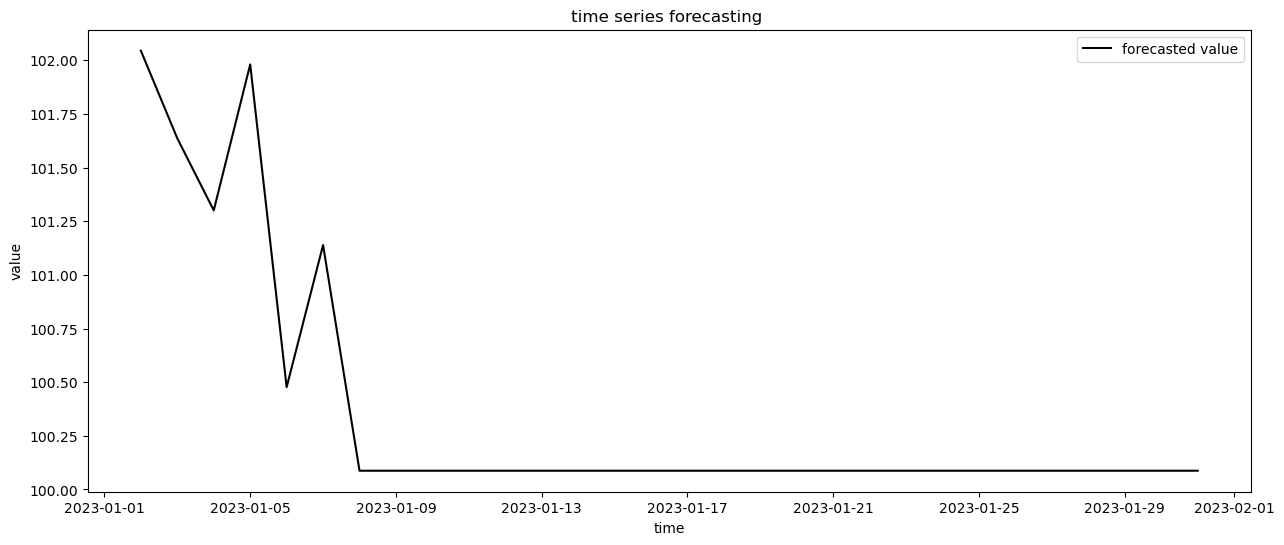

In [30]:
plt.figure(figsize=(15,6))
#plt.plot(time_series,color='lightgreen' ,label='hisotical value ')
plt.plot(forecasted_val,color='black',label = 'forecasted value')
plt.xlabel('time')
plt.ylabel('value')
plt.title('time series forecasting ')
plt.legend()
plt.show()


In [47]:
past_pred = list(prediction)
lagged_value = past_pred[-6:]
n_step = 30 # in future how many forecasting we would like to have 
for i in range (1,n_step+1):
    lagged_value = past_pred[-6:]
    next_pred = model_fit.forecast(steps=1,dynamic=True)[0]
    past_pred.append(next_pred)



[102.04456939558196, 101.63622637846149, 101.30054269646209, 101.9807941165213, 100.47670499211502, 101.13899815300731, 100.08737228422574, 100.08737228422574, 100.08737228422574, 100.08737228422574, 100.08737228422574, 100.08737228422574, 100.08737228422574, 100.08737228422574, 100.08737228422574, 100.08737228422574, 100.08737228422574, 100.08737228422574, 100.08737228422574, 100.08737228422574, 100.08737228422574, 100.08737228422574, 100.08737228422574, 100.08737228422574, 100.08737228422574, 100.08737228422574, 100.08737228422574, 100.08737228422574, 100.08737228422574, 100.08737228422574, 100.08737228422574, 102.04456939558196, 102.04456939558196, 102.04456939558196, 102.04456939558196, 102.04456939558196, 102.04456939558196, 102.04456939558196, 102.04456939558196, 102.04456939558196, 102.04456939558196, 102.04456939558196, 102.04456939558196, 102.04456939558196, 102.04456939558196, 102.04456939558196, 102.04456939558196, 102.04456939558196, 102.04456939558196, 102.04456939558196, 

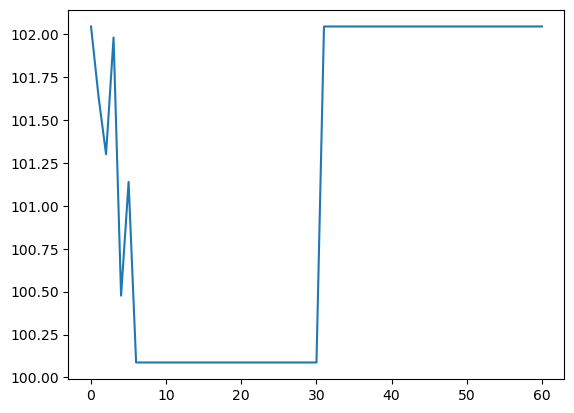

In [48]:
plt.plot(past_pred)